<a href="https://colab.research.google.com/github/the-menna-sherif/Refreshing_ML_Muscle_Memory/blob/main/learnersnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle's Intro to Machine Learning Course



First, we load and inspect the data.

In [1]:
import pandas as pd
import numpy as np

melbourne_data = pd.read_csv("/content/melb_data.csv")
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
# fetching the most expensive house price
most_exp = melbourne_data['Price'].max()

print(np.ceil(most_exp))

9000000.0


In [ ]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Second, we do some superficial cleaning. We will use the dropna function to omit the empty entries. Setting axis=0 means we are dropping *rows* not columns.

In [ ]:
melbourne_data = melbourne_data.dropna(axis=0)

melbourne_data.shape


(6196, 21)

Third, we set our target variable, feature list and training data.

In [ ]:
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
x = melbourne_data[melbourne_features]

x.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [ ]:
x.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [ ]:
from sklearn.tree import DecisionTreeRegressor

melbourne_DT_model = DecisionTreeRegressor(random_state=1)

melbourne_DT_model.fit(x, y)

DecisionTreeRegressor(random_state=1)

In [ ]:
# Making predictions for the first 5 houses
print(x.head())

print("The predictions are:")

print(melbourne_DT_model.predict(x.head()))

   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [ ]:
# Verify the accuracy
print(y.head())

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error
predicted_prices = melbourne_DT_model.predict(x)


mae = mean_absolute_error(y, predicted_prices)
print(mae)

1115.7467183128902


In [ ]:
from sklearn.model_selection import train_test_split

# Break down data
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=0)

# Define model
melbourne_DT_model_splits = DecisionTreeRegressor()

# Fit/train model
fit_model = melbourne_DT_model_splits.fit(train_x, train_y)

# Evaluate model
predictions = fit_model.predict(val_x) # an array of (1549,) aka valx's shape
mae_splits = mean_absolute_error(val_y, predictions)
print(mae_splits)

272789.3025607919


# Overfitting & Underfitting

Here, we create a function to **compare** different MAE values based on different **max_leaf_nodes** values.

In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
  model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
  fit_model= model.fit(train_X, train_y)
  predictions = fit_model.predict(val_x)

  mae = mean_absolute_error(val_y, predictions)
  return(mae)

In [ ]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    mae = get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y)
    # print("Max leaf nodes: %d \t\t Mean Absolute Error: %d" %(max_leaf_nodes, get_mae)) --> %d will throw a TypeError
    print("Max leaf nodes: %d\t\tMean Absolute Error: %.2f" % (max_leaf_nodes, mae))


Max leaf nodes: 5		Mean Absolute Error: 385696.54
Max leaf nodes: 50		Mean Absolute Error: 279794.61
Max leaf nodes: 500		Mean Absolute Error: 261718.11
Max leaf nodes: 5000		Mean Absolute Error: 271320.97


# Random Forests
Now we take a look at a new model, Random Forests. They are many DTs which have their predictions averaged.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define model
RF_model = RandomForestRegressor()

# Fit model
fitted_RF_model = RF_model.fit(train_x, train_y)

# Preditions
RF_prdxns = fitted_RF_model.predict(val_x)

# Evaluate
mae_RF = mean_absolute_error(val_y, RF_prdxns)
print(mae_RF)

206660.8999013188


# Kaggle's Intermediate ML Course


In [ ]:
melbourne_data.shape

(13580, 21)

In [ ]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [3]:
# Check columns first
print(melbourne_data.columns)

# Use correct column name (example: 'Price')
melbourne_data.dropna(axis=0, subset=['Price'], inplace=True)

y = melbourne_data['Price']
x = melbourne_data.drop(['Price'], axis=1)

# Keep only numeric predictors
x = x.select_dtypes(exclude=['object'])

x.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

# Dealing with missing data
**Typically, there are 3 (or 2.5) ways to deal with missing data:**


1.   Drop the entries with the missing data
2.   Imputation
3.   Imputation and adding a marker column



In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)


In [ ]:
# Find missing values in each column of training data
missing_val_count_col = x_train.isnull().sum()

# Print columns with missing values and number of entries with missing values
print(missing_val_count_col[missing_val_count_col >0])

Car               50
BuildingArea    4831
YearBuilt       4039
dtype: int64


**Dropping columns**

In [ ]:
# Get col names in list (with missing entries)
col_names = [ col for col in x_train.columns
             if x_train[col].isnull().any()
]

# Drop the columns in their entirety
drop_num_x_train = x_train.drop(col_names, axis=1)
drop_num_x_test = x_test.drop(col_names, axis=1)


**Imputation**

In [ ]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer() # can add strategy, aka what to impute missing value with (mean, mode, a constant, etc.)
imputed_num_x_train = pd.DataFrame(my_imputer.fit_transform(x_train), columns=x_train.columns)
imputed_num_x_test = pd.DataFrame(my_imputer.transform(x_test), columns=x_test.columns)

# Handling categorical variables

Categorical variables fall within a set number of categories (obviously). There are 3 possible ways to handles them:

1.   Drop columns
2.   Ordinal Encoding
3.   One-hot Encoding



**Dropping columns**

In [6]:
s= ( x.dtypes=="object")
object_cols = list(s[s].index)

drop_cat_x = x.select_dtypes(exclude=['object'])
drop_cat_x.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


**Ordinal Encoding**
This encoding assumes a different integer to each unique value per category. Encouraged for ordered/ weighted categories, aka *Ordinal* vars. For tree based models (DT, RF, etc.), this works well.


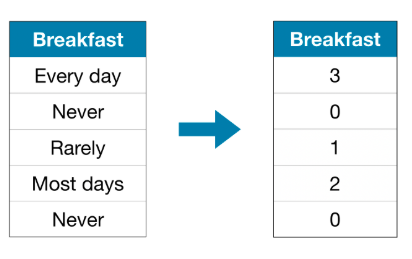

In [8]:
from sklearn.preprocessing import OrdinalEncoder

x_ordinal_train = x_train.copy()
my_oe = OrdinalEncoder()
x_ordinal_train[object_cols] = my_oe.fit_transform(x_ordinal_train[object_cols])
x_ordinal_train.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
10851,2,7.0,3071.0,2.0,1.0,0.0,225.0,100.0,1960.0,-37.75642,144.98755,8870.0
1132,3,11.2,3186.0,3.0,2.0,0.0,0.0,NaN,NaN,-37.92490,144.99280,10579.0
4355,2,2.3,3051.0,2.0,2.0,1.0,0.0,98.0,1998.0,-37.80150,144.95260,6821.0
7205,3,11.8,3204.0,3.0,2.0,2.0,0.0,163.0,1980.0,-37.90710,145.04390,3578.0
12175,3,10.5,3020.0,3.0,1.0,1.0,672.0,110.0,1970.0,-37.80118,144.80996,6763.0


**One Hot Encoding**
This creates c columns (c = number of distinct values of a variable) per categorical variable, populated by 1 or 0 (absence or persence of said distinct value).

Doesn't assume order or weight so works best with nominal values. Fails with variables with high cardinality.

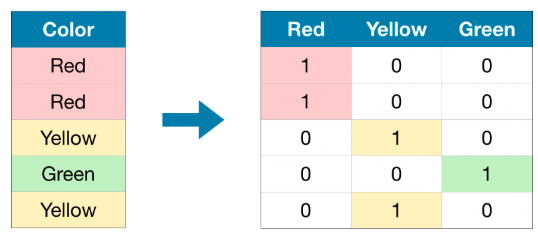

In [16]:
from sklearn.preprocessing import OneHotEncoder

my_onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
onehot_train = pd.DataFrame(my_onehot.fit_transform(x_train[object_cols]), columns=my_onehot.get_feature_names_out(object_cols), index=x_train.index)

full_onehot_train = pd.concat([x_train.drop(columns=object_cols), onehot_train], axis=1)
full_onehot_train.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')